In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x23657345d90>,
 'caps': [<matplotlib.lines.Line2D at 0x23658f45b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x236589ec310>],
 'medians': [<matplotlib.lines.Line2D at 0x23658f64b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x23658f65a50>],
 'means': []}

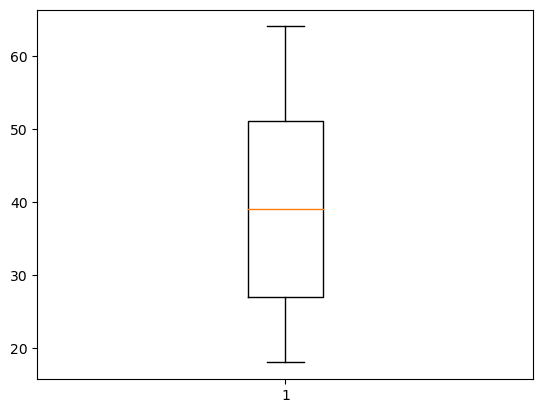

In [7]:
plt.boxplot(data['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23659843850>,
 'caps': [<matplotlib.lines.Line2D at 0x23659851210>,
 'boxes': [<matplotlib.lines.Line2D at 0x236598368d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23659852990>],
 'fliers': [<matplotlib.lines.Line2D at 0x23659853410>],
 'means': []}

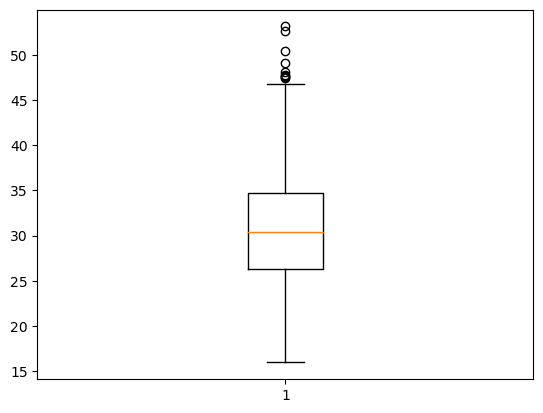

In [8]:
plt.boxplot(data['bmi'])

In [9]:
Q1 = data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['bmi'] >= upper)[0]
lower_index = np.where(data['bmi'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


26.29625 34.69375 8.3975


{'whiskers': [<matplotlib.lines.Line2D at 0x23658fdf890>,
 'caps': [<matplotlib.lines.Line2D at 0x23658fe91d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23658fdeb90>],
 'medians': [<matplotlib.lines.Line2D at 0x23658fea650>],
 'fliers': [<matplotlib.lines.Line2D at 0x23658feb010>],
 'means': []}

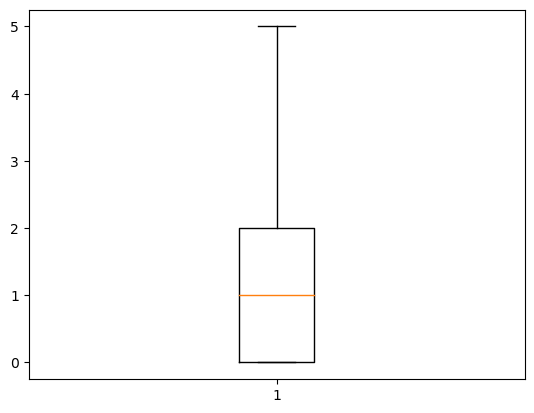

In [10]:
plt.boxplot(data['children'])

In [11]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])

In [13]:
le_smoker = LabelEncoder()
data['smoker'] = le_smoker.fit_transform(data['smoker'])

In [14]:
le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])

In [15]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [16]:
x = data.drop('charges', axis=1)
y = data['charges']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [18]:
x_train.shape

(1063, 6)

In [27]:
pd.DataFrame({'True values': y_test, 'Predicted values': y_pred})

,True values,Predicted values
991,7144.86265,6686.43130
354,14133.03775,1631.82120
311,1737.37600,1731.67700
31,2198.18985,2196.47320
996,7418.52200,7682.67000
...,...,...
67,6389.37785,6664.68595
915,2473.33410,2480.97910
1122,46661.44240,60021.39897
845,45008.95550,52590.82939


In [36]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Train score:', model.score(x_train, y_train))
print('Test score:', model.score(x_test, y_test))
print('Error:', mean_squared_error(y_test, y_pred))


Train score: 0.9988059670902081
Test score: 0.709497087655891
Error: 41067114.97878163


In [40]:
model.get_depth()

19

In [37]:
model2 = DecisionTreeRegressor(max_depth=5)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print('Train score:', model2.score(x_train, y_train))
print('Test score', model2.score(x_test, y_test))
print('Error:', mean_squared_error(y_test, y_pred))

Train score: 0.8825843043165434
Test score 0.82574775023104
Error: 24633271.724645324


In [38]:
model3 = DecisionTreeRegressor(max_depth=10)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
print('Train score:', model3.score(x_train, y_train))
print('Test score', model3.score(x_test, y_test))
print('Error:', mean_squared_error(y_test, y_pred))

Train score: 0.9616531945770188
Test score 0.7272356520044223
Error: 38559492.401845984
